In [2]:
# Import and configuration
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

 
from config import *

In [3]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path, 
                            encoding="iso-8859-1", low_memory=False)
census_data = pd.read_csv(census_data_path, 
                          encoding="iso-8859-1", low_memory=False)



In [4]:
census_data.head()
census_data = census_data.rename(columns={"State":"State Name"})
census_data.head()

,State Name,2013,2014,2015,2016,2017
0,Alabama,4833722,4849377,4858979,4863300,4874747
1,Alaska,735132,736732,738432,741894,739795
2,Arizona,6626624,6731484,6828065,6931071,7016270
3,Arkansas,2959373,2966369,2978204,2988248,3004279
4,California,38332521,38802500,39144818,39250017,39536653


In [5]:
# Your code for geography-related analysis starts here
clean_incident_data = incident_data.loc[:,['Year','State Name',
                                        'Number of Killed',
                                        'Number of Injured'    
]]
clean_incident_data.head(5)

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3
2,2013,Ohio,1,3
3,2013,Colorado,4,0
4,2013,North Carolina,2,2


In [72]:
#create group based on values in the year column
killed_data = clean_incident_data["Number of Killed"].value_counts()
injured_data = clean_incident_data["Number of Injured"].value_counts()

grouped_year_df = clean_incident_data.groupby('Year')

count_years = grouped_year_df['Year'].count()
 

In [7]:
year_counts = clean_incident_data["Year"].value_counts()
year_counts = year_counts.head()
year_counts = pd.DataFrame(year_counts)
year_counts = year_counts.reset_index()
year_counts = year_counts.rename(columns={'index':'Year', 'Year': 'Total Incidents'})
year_counts.head()
year_counts

year_counts = year_counts.sort_values("Year")

year_counts.drop(year_counts.index[4], inplace=True)
year_counts 


,Year,Total Incidents
3,2014,51854
2,2015,53579
1,2016,58763
0,2017,61401


<IPython.core.display.Javascript object>


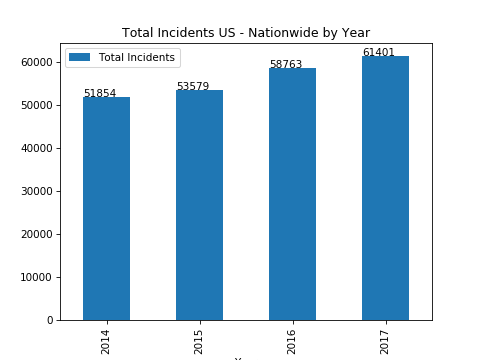

In [75]:

Total_Incidents = [51854, 53579, 58763, 61401]

Incident_years = pd.Series.from_array(Total_Incidents)


x_labels = [2014, 2015, 2016, 2017] 


ax = df.plot.bar(title="Total Incidents US - Nationwide by Year")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.show()
plt.savefig("../Output/total_nationwide_years.png")

In [124]:
grouped_year_df = clean_incident_data.groupby(['Year'])

grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
grouped_year_df.head()

,Number of Killed,Number of Injured,Total Incidents
Year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


In [125]:
incident_data.columns

Index(['Year', 'State Name', 'Number of Killed', 'Number of Injured',
       'Incident Info', 'Latitude', 'Longitude', 'Participant Age',
       'Participant Age Group', 'Participant Gender',
       'Participant Relationship', 'Participant Status', 'Participant Type',
       'State Abbr'],
      dtype='object')

In [126]:
reduced_incident_pd = incident_data.iloc[:, [
    0, 1, 2, 3]]
reduced_incident_pd.head()

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3
2,2013,Ohio,1,3
3,2013,Colorado,4,0
4,2013,North Carolina,2,2


In [127]:
reduced_incident_pd["Total Incidents"] = reduced_incident_pd["Number of Killed"] + reduced_incident_pd["Number of Injured"] 
 

C:\Users\wgdav\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [223]:
# Create DataFrame total incident by year 2013
group_2013 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2013]
group_2013.head()
del group_2013['Number of Killed']
del group_2013['Number of Injured']
group_2013.head()
 
state_summary_2013 = group_2013.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2013')
state_summary_2013['Total Incidents 2013'].astype(int)
state_summary_2013.head(n=1)

,State Name,Total Incidents 2013
0,Alabama,2


In [224]:
group_2014 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2014]
group_2014.head()
del group_2014['Number of Killed']
del group_2014['Number of Injured']
group_2014.head()
 
state_summary_2014 = group_2014.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2014')
state_summary_2014['Total Incidents 2014'].astype(int)
state_summary_2014.head(n=1)

,State Name,Total Incidents 2014
0,Alabama,1318


In [225]:
group_2015 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2015]
group_2015.head()
del group_2015['Number of Killed']
del group_2015['Number of Injured']
group_2015.head()


state_summary_2015 = group_2015.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2015')
state_summary_2015['Total Incidents 2015'].astype(int)
state_summary_2015.head(n=1)

,State Name,Total Incidents 2015
0,Alabama,1034


In [226]:
group_2016 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2016]
group_2016.head()
del group_2016['Number of Killed']
del group_2016['Number of Injured']
group_2016.head()

state_summary_2016 = group_2016.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2016')
state_summary_2016['Total Incidents 2016'].astype(int)
state_summary_2016.head(n=1)

,State Name,Total Incidents 2016
0,Alabama,1309


In [227]:
group_2017 = reduced_incident_pd.loc[reduced_incident_pd["Year"] == 2017]
group_2017.head()
del group_2017['Number of Killed']
del group_2017['Number of Injured']
group_2017.head()

state_summary_2017 = group_2017.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2017')
state_summary_2017['Total Incidents 2017'].astype(int)
state_summary_2017.head(n=1)

,State Name,Total Incidents 2017
0,Alabama,1461


In [228]:
combined_state_year = pd.merge(state_summary_2013, state_summary_2014, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2015, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2016, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2017, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , census_data, how='outer', on='State Name')
combined_state_year = combined_state_year.rename(columns={"2013":"Population 2013","2014":"Population 2014","2015":"Population 2015", "2016":"Population 2016", "2017": "Population 2017"})

combined_state_year.fillna(0, inplace=True)
combined_state_year.head(53)

del combined_state_year['Total Incidents 2013']
del combined_state_year['Population 2013']
combined_state_year.head(n=1)

,State Name,Total Incidents 2014,Total Incidents 2015,Total Incidents 2016,Total Incidents 2017,Population 2014,Population 2015,Population 2016,Population 2017
0,Alabama,1318.0,1034.0,1309.0,1461.0,4849377,4858979,4863300,4874747


In [280]:
combined_state_year['Incidents 2014 per Capita'] = (combined_state_year['Total Incidents 2014'] / combined_state_year['Population 2014'] * 10000)
combined_state_year['Incidents 2015 per Capita'] = (combined_state_year['Total Incidents 2015'] / combined_state_year['Population 2015'] * 10000)
combined_state_year['Incidents 2016 per Capita'] = (combined_state_year['Total Incidents 2016'] / combined_state_year['Population 2016'] * 10000)
combined_state_year['Incidents 2017 per Capita'] = (combined_state_year['Total Incidents 2017'] / combined_state_year['Population 2017'] * 10000)
combined_state_year 
combined_state_year['Incidents 2017 per Capita'] = combined_state_year['Incidents 2017 per Capita'].apply(round)
combined_state_year['Incidents 2016 per Capita'] = combined_state_year['Incidents 2016 per Capita'].apply(round)
combined_state_year['Incidents 2015 per Capita'] = combined_state_year['Incidents 2015 per Capita'].apply(round)
combined_state_year['Incidents 2014 per Capita'] = combined_state_year['Incidents 2014 per Capita'].apply(round)
combined_state_year.head(n=1)


,State Name,Total Incidents 2014,Total Incidents 2015,Total Incidents 2016,Total Incidents 2017,Population 2014,Population 2015,Population 2016,Population 2017,Incidents 2014 per Capita,Incidents 2015 per Capita,Incidents 2016 per Capita,Incidents 2017 per Capita
0,Alabama,1318.0,1034.0,1309.0,1461.0,4849377,4858979,4863300,4874747,3,2,3,3


In [281]:
# Filter the DataFrame down only to those columns to chart
top_5_2014 = combined_state_year[["State Name","Incidents 2014 per Capita"]]
top_5_2014 = top_5_2014.sort_values('Incidents 2014 per Capita',ascending=False)
top_5_2015 = combined_state_year[["State Name","Incidents 2015 per Capita"]]
top_5_2015 = top_5_2015.sort_values('Incidents 2015 per Capita',ascending=False)
top_5_2016 = combined_state_year[["State Name","Incidents 2016 per Capita"]]
top_5_2016 = top_5_2016.sort_values('Incidents 2016 per Capita',ascending=False)
top_5_2017 = combined_state_year[["State Name","Incidents 2017 per Capita"]]
top_5_2017 = top_5_2017.sort_values('Incidents 2017 per Capita',ascending=False)

combined_top_5 = pd.merge(top_5_2014 , top_5_2015, how='outer', on='State Name')
combined_top_5 = pd.merge(combined_top_5 , top_5_2016, how='outer', on='State Name')
combined_top_5 = pd.merge(combined_top_5 , top_5_2017, how='outer', on='State Name')
combined_top_5.head(n=5)

,State Name,Incidents 2014 per Capita,Incidents 2015 per Capita,Incidents 2016 per Capita,Incidents 2017 per Capita
0,District of Columbia,13,8,7,16
1,Delaware,5,4,3,4
2,Louisiana,4,4,4,4
3,Alabama,3,2,3,3
4,Vermont,3,2,2,1


<IPython.core.display.Javascript object>


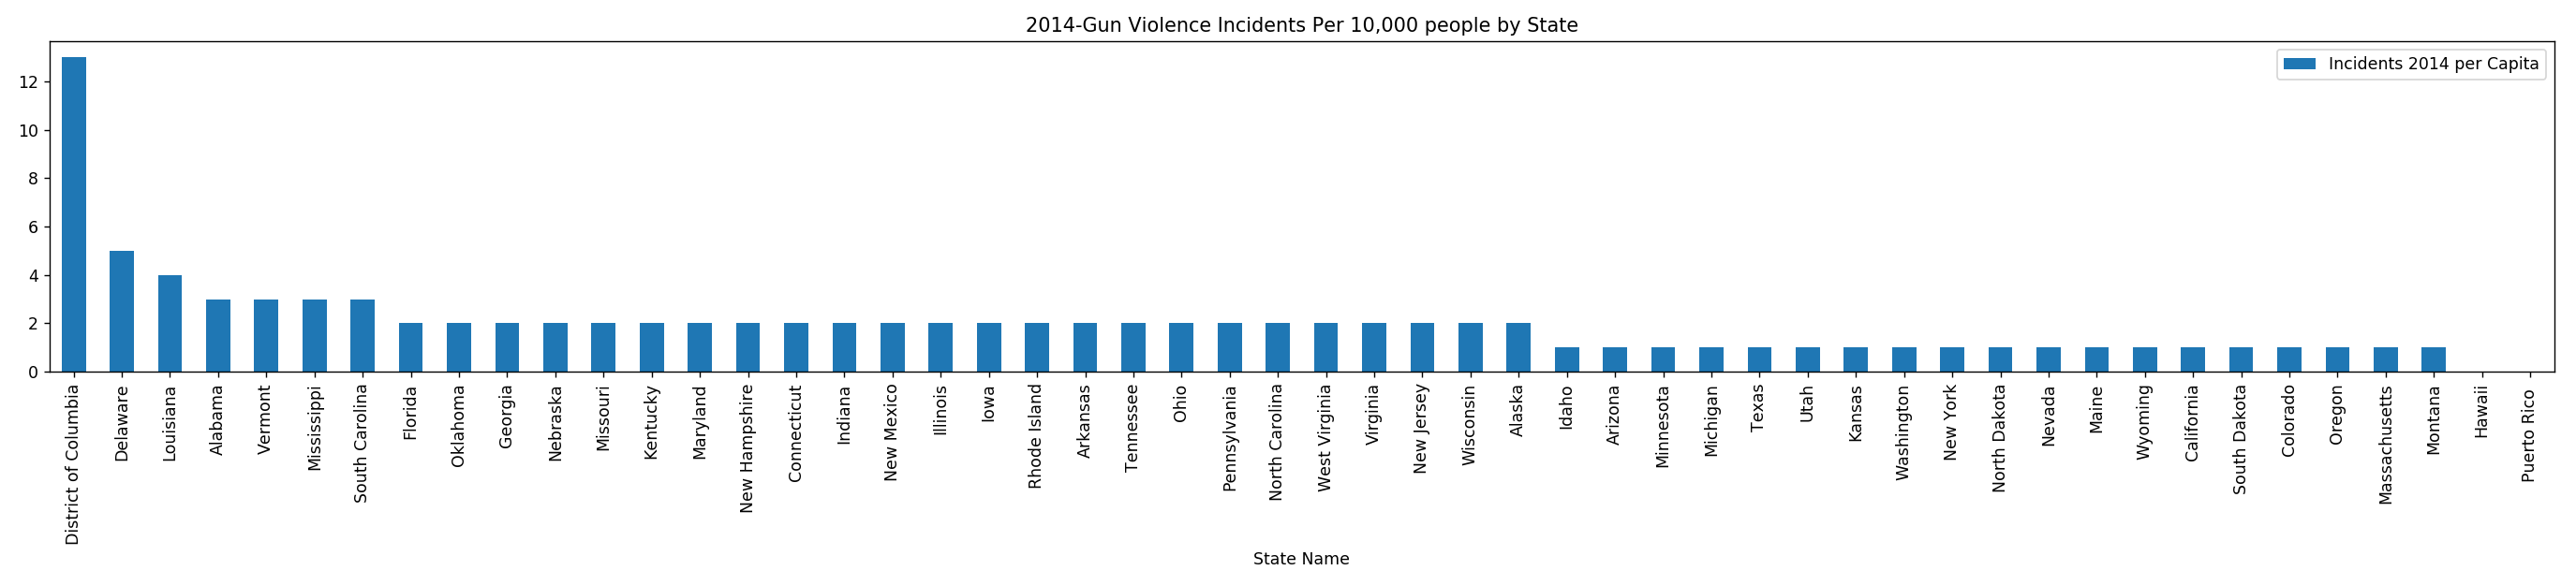

,State Name,Incidents 2014 per Capita
6,District of Columbia,13
5,Delaware,5
13,Louisiana,4
0,Alabama,3
49,Vermont,3


In [301]:
state_capita_2014 = combined_top_5[["State Name","Incidents 2014 per Capita"]]
state_capita_2014 = state_capita_2014.sort_values('Incidents 2014 per Capita',ascending=False)

x_axis = np.arange(len(state_capita_2014))
tick_locations = [value+0.1 for value in x_axis]
# Set the index to be "State" so they will be used as labels
state_capita_2014 = state_capita_2014.set_index("State Name")
state_capita_2014.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2014.plot(kind="bar", figsize=(22,5))
# Set a title for the chart
plt.title("2014-Gun Violence Incidents Per 10,000 people by State")


plt.show()
plt.tight_layout()
top_5_2014.head(n=5)

In [285]:
plt.savefig("../Output/2014-Total Incident 10k.png")


<IPython.core.display.Javascript object>


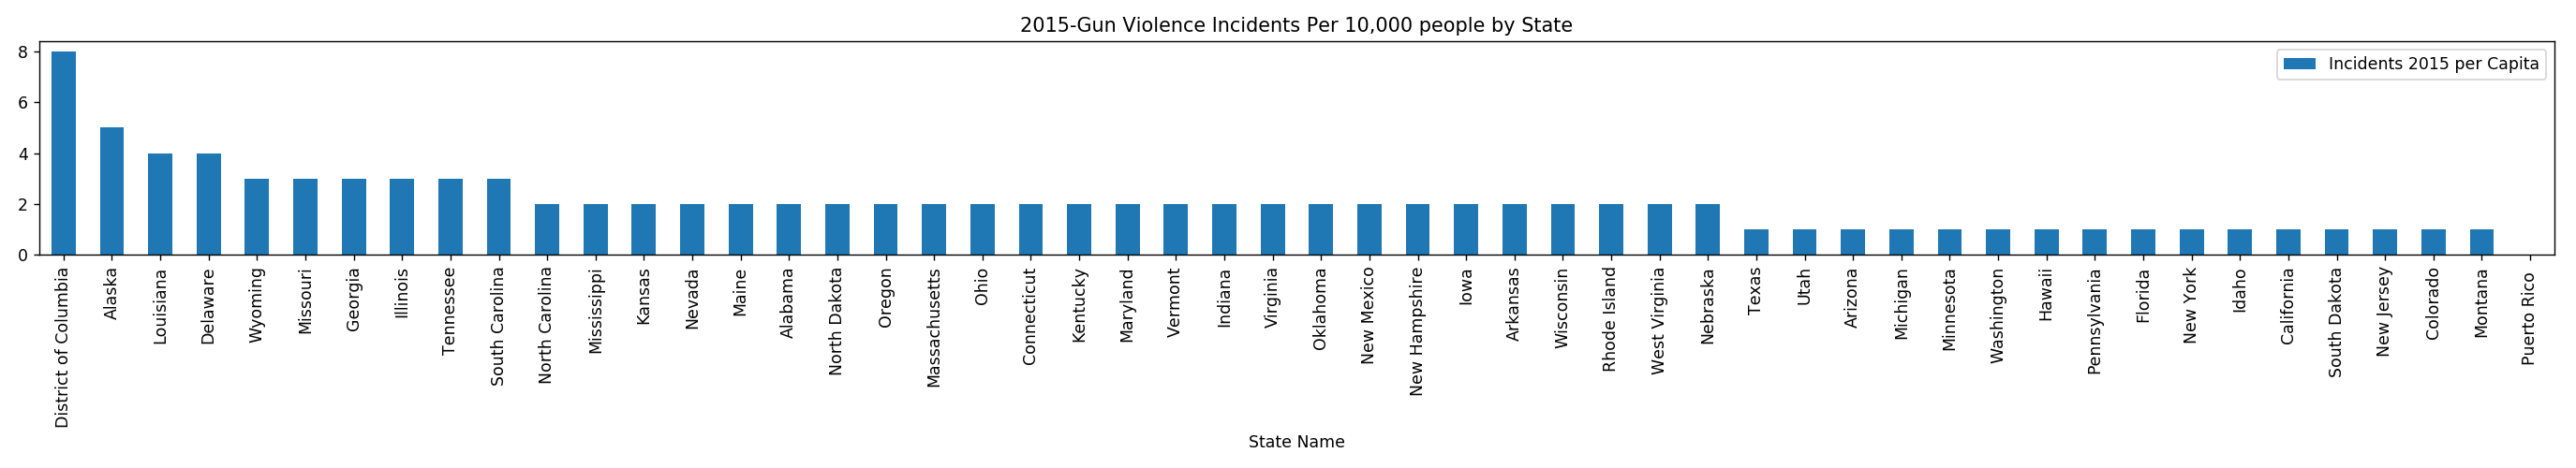

,State Name,Incidents 2015 per Capita
6,District of Columbia,8
37,Alaska,5
5,Delaware,4
13,Louisiana,4
50,Wyoming,3


In [299]:
state_capita_2015 = combined_top_5[["State Name","Incidents 2015 per Capita"]]
state_capita_2015 = state_capita_2015.sort_values('Incidents 2015 per Capita',ascending=False)
state_capita_2015.head()

# Set the index to be "State" so they will be used as labels
state_capita_2015 = state_capita_2015.set_index("State Name")

state_capita_2015.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2015.plot(kind="bar", figsize=(22,4))

# Set a title for the chart
plt.title("2015-Gun Violence Incidents Per 10,000 people by State")


plt.show()
plt.tight_layout()

plt.savefig("../Output/2015-Total Incident 10k.png")
top_5_2015.head(n=5)

<IPython.core.display.Javascript object>


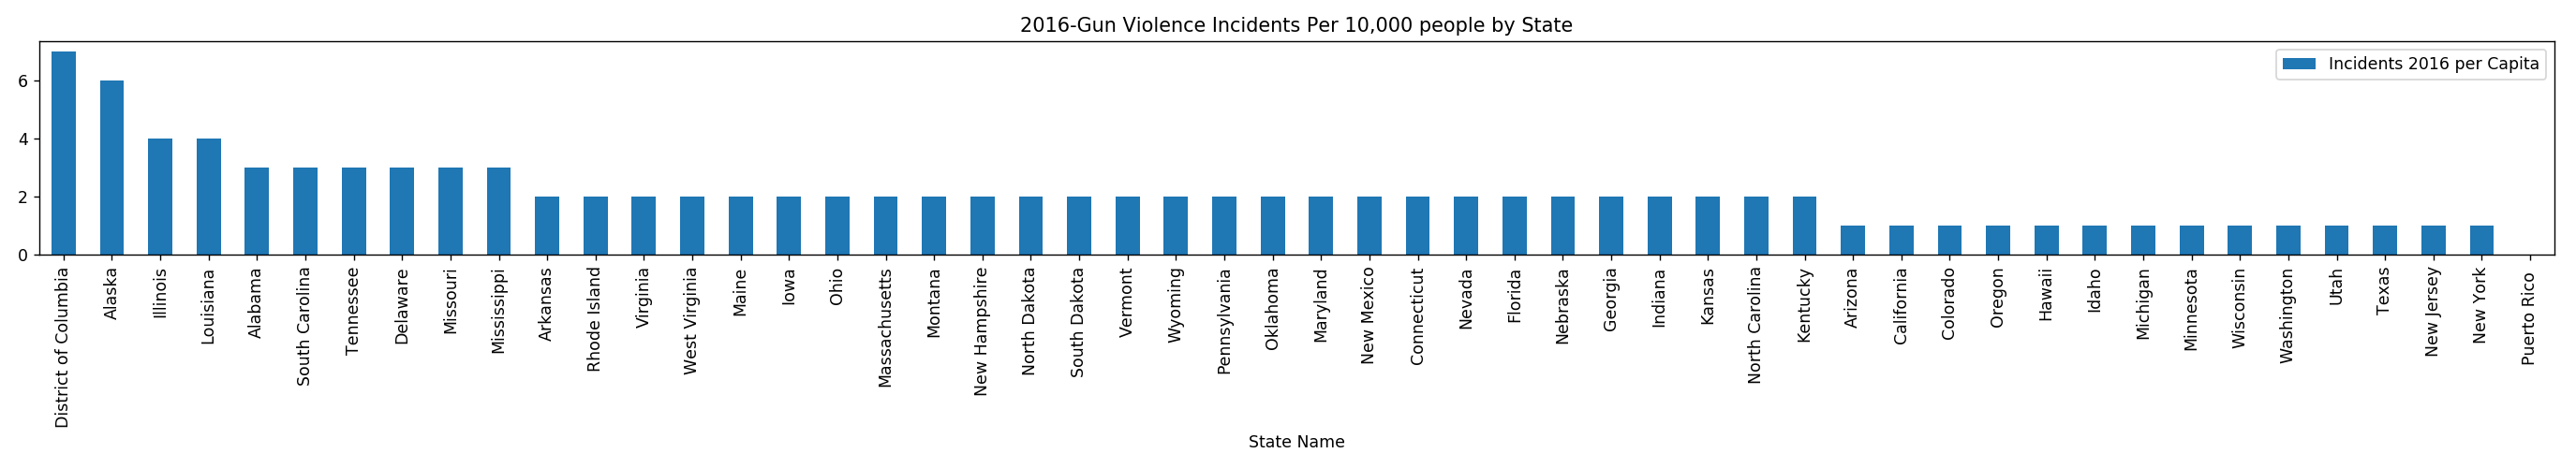

,State Name,Incidents 2016 per Capita
6,District of Columbia,7
37,Alaska,6
9,Illinois,4
13,Louisiana,4
0,Alabama,3


In [298]:
state_capita_2016 = combined_state_year[["State Name","Incidents 2016 per Capita"]]
state_capita_2016 = state_capita_2016.sort_values('Incidents 2016 per Capita',ascending=False)
 
# Set the index to be "State" so they will be used as labels
state_capita_2016 = state_capita_2016.set_index("State Name")

state_capita_2016.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2016.plot(kind="bar", figsize=(22,4))

# Set a title for the chart
plt.title("2016-Gun Violence Incidents Per 10,000 people by State")


plt.show()
plt.tight_layout()
plt.savefig("../Output/2016-Total Incident 10k.png")
top_5_2016.head(n=5)

<IPython.core.display.Javascript object>


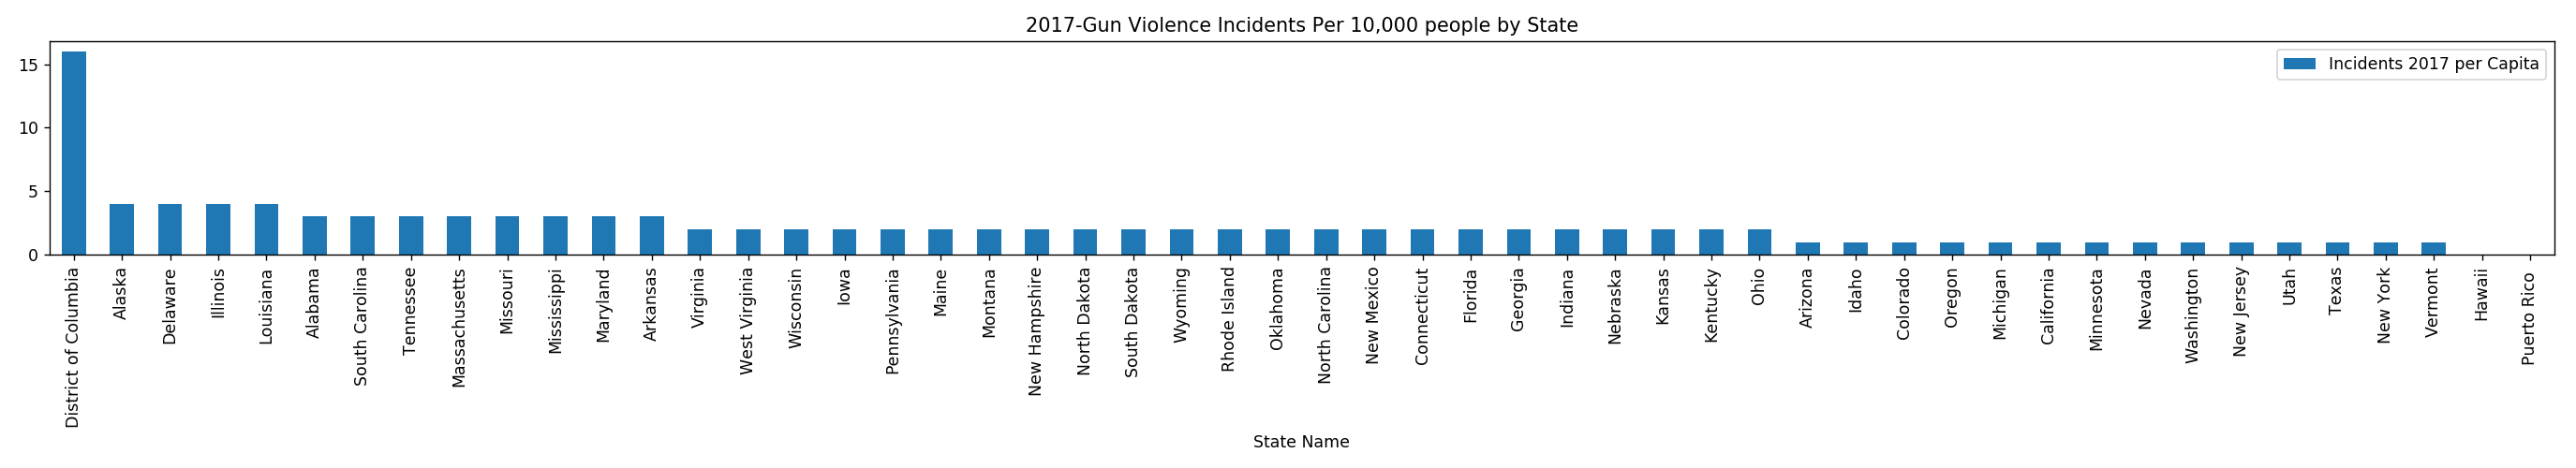

,State Name,Incidents 2017 per Capita
6,District of Columbia,16
37,Alaska,4
5,Delaware,4
9,Illinois,4
13,Louisiana,4


In [297]:
state_capita_2017 = combined_state_year[["State Name","Incidents 2017 per Capita"]]
state_capita_2017 = state_capita_2017.sort_values('Incidents 2017 per Capita',ascending=False)
 
# Set the index to be "State" so they will be used as labels
state_capita_2017 = state_capita_2017.set_index("State Name")

state_capita_2017.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2017.plot(kind="bar", figsize=(22,4))

# Set a title for the chart
plt.title("2017-Gun Violence Incidents Per 10,000 people by State")


plt.show()
plt.tight_layout()
plt.savefig("../Output/2017-Total Incident 10k.png")
top_5_2017.head(n=5)

In [289]:
#sum incidents
grouped_year_df = clean_incident_data.groupby(['Year'])

grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
 